In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

### Data Loading

In [2]:
data=pd.read_csv("csv_result-KDDTrain+.csv")
data

# https://github.com/jmnwong/NSL-KDD-Dataset

,id,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125969,0,tcp,private,S0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,125970,8,udp,private,SF,105,145,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,125971,0,tcp,smtp,SF,2231,384,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,125972,0,tcp,klogin,S0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [3]:
data.columns.to_list()

['id',
 "'duration'",
 "'protocol_type'",
 "'service'",
 "'flag'",
 "'src_bytes'",
 "'dst_bytes'",
 "'land'",
 "'wrong_fragment'",
 "'urgent'",
 "'hot'",
 "'num_failed_logins'",
 "'logged_in'",
 "'num_compromised'",
 "'root_shell'",
 "'su_attempted'",
 "'num_root'",
 "'num_file_creations'",
 "'num_shells'",
 "'num_access_files'",
 "'num_outbound_cmds'",
 "'is_host_login'",
 "'is_guest_login'",
 "'count'",
 "'srv_count'",
 "'serror_rate'",
 "'srv_serror_rate'",
 "'rerror_rate'",
 "'srv_rerror_rate'",
 "'same_srv_rate'",
 "'diff_srv_rate'",
 "'srv_diff_host_rate'",
 "'dst_host_count'",
 "'dst_host_srv_count'",
 "'dst_host_same_srv_rate'",
 "'dst_host_diff_srv_rate'",
 "'dst_host_same_src_port_rate'",
 "'dst_host_srv_diff_host_rate'",
 "'dst_host_serror_rate'",
 "'dst_host_srv_serror_rate'",
 "'dst_host_rerror_rate'",
 "'dst_host_srv_rerror_rate'",
 "'class'"]

In [4]:
data.dtypes

# we need to one-hot encode 'protocol_type', 'service' , 'flag' , 'class'

id                                 int64
'duration'                         int64
'protocol_type'                   object
'service'                         object
'flag'                            object
'src_bytes'                        int64
'dst_bytes'                        int64
'land'                             int64
'wrong_fragment'                   int64
'urgent'                           int64
'hot'                              int64
'num_failed_logins'                int64
'logged_in'                        int64
'num_compromised'                  int64
'root_shell'                       int64
'su_attempted'                     int64
'num_root'                         int64
'num_file_creations'               int64
'num_shells'                       int64
'num_access_files'                 int64
'num_outbound_cmds'                int64
'is_host_login'                    int64
'is_guest_login'                   int64
'count'                            int64
'srv_count'     

In [5]:
data["'protocol_type'"].value_counts() # nominal attribute hence one-hot

tcp     102689
udp      14993
icmp      8291
Name: 'protocol_type', dtype: int64

In [6]:
data["'service'"].value_counts() 

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
harvest          2
aol              2
http_8001        2
http_2784        1
Name: 'service', Length: 70, dtype: int64

In [7]:
data["'flag'"].value_counts() 

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: 'flag', dtype: int64

In [8]:
data["'class'"].value_counts() 

normal     67343
anomaly    58630
Name: 'class', dtype: int64

In [9]:
X=data.drop("'class'",axis=1)

In [10]:
X

,id,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,2,0,udp,other,SF,146,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,3,0,tcp,private,S0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,4,0,tcp,http,SF,232,8153,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,125969,0,tcp,private,S0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,125970,8,udp,private,SF,105,145,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,125971,0,tcp,smtp,SF,2231,384,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,125972,0,tcp,klogin,S0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [11]:
for item in data.columns.to_list():
    print("######    "+item+"    ######\n\n")
    print(data[item].value_counts())
    print("\n\n#####################################\n\n")

######    id    ######


2049     1
6870     1
2772     1
13011    1
15058    1
        ..
1322     1
7465     1
5416     1
27943    1
2047     1
Name: id, Length: 125973, dtype: int64


#####################################


######    'duration'    ######


0        115955
1          1989
2           843
3           557
4           351
          ...  
23132         1
2774          1
727           1
13073         1
6141          1
Name: 'duration', Length: 2981, dtype: int64


#####################################


######    'protocol_type'    ######


tcp     102689
udp      14993
icmp      8291
Name: 'protocol_type', dtype: int64


#####################################


######    'service'    ######


http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
harvest          2
aol              2
http_8001        2
http_2784        1
Name: 'service', Length: 70, dtype: int64


###############################

normal     67343
anomaly    58630
Name: 'class', dtype: int64


#####################################




In [12]:
# remove 'land' 'num_shells' 'num_outbound_cmds' 'is_host_login'  columns

# highly imbalanced data distribution and not much relevance to class

X = X.drop("'land'",axis=1)
X = X.drop("'num_shells'",axis=1)
X = X.drop("'num_outbound_cmds'",axis=1)
X = X.drop("'is_host_login'",axis=1)
X = X.drop('id',axis=1)


In [13]:
Y=data["'class'"]

In [14]:
categorical_cols  = ["'num_failed_logins'", "'logged_in'", "'root_shell'", "'su_attempted'", "'num_root'", "'urgent'", 
                     "'is_guest_login'", "'wrong_fragment'", "'num_file_creations'", "'num_access_files'", "'num_compromised'"]

In [15]:
X.columns

Index([''duration'', ''protocol_type'', ''service'', ''flag'', ''src_bytes'',
       ''dst_bytes'', ''wrong_fragment'', ''urgent'', ''hot'',
       ''num_failed_logins'', ''logged_in'', ''num_compromised'',
       ''root_shell'', ''su_attempted'', ''num_root'', ''num_file_creations'',
       ''num_access_files'', ''is_guest_login'', ''count'', ''srv_count'',
       ''serror_rate'', ''srv_serror_rate'', ''rerror_rate'',
       ''srv_rerror_rate'', ''same_srv_rate'', ''diff_srv_rate'',
       ''srv_diff_host_rate'', ''dst_host_count'', ''dst_host_srv_count'',
       ''dst_host_same_srv_rate'', ''dst_host_diff_srv_rate'',
       ''dst_host_same_src_port_rate'', ''dst_host_srv_diff_host_rate'',
       ''dst_host_serror_rate'', ''dst_host_srv_serror_rate'',
       ''dst_host_rerror_rate'', ''dst_host_srv_rerror_rate''],
      dtype='object')

In [16]:
# Columns to standard scale 

X_cols = X.columns.to_list()

cols_to_scale = list(filter(lambda x: x not in categorical_cols, X_cols))

### Plotting and EDA

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


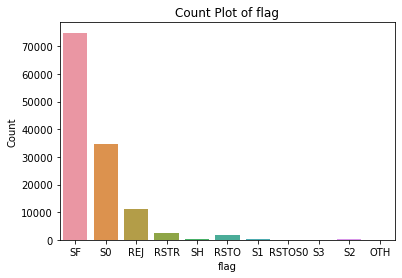

In [17]:
sns.countplot(X["'flag'"])
plt.xlabel('flag')
plt.ylabel('Count')
plt.title('Count Plot of flag')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


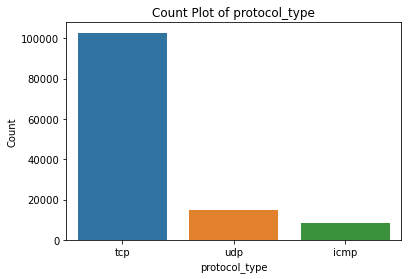

In [18]:
sns.countplot(X["'protocol_type'"])
plt.xlabel('protocol_type')
plt.ylabel('Count')
plt.title('Count Plot of protocol_type')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


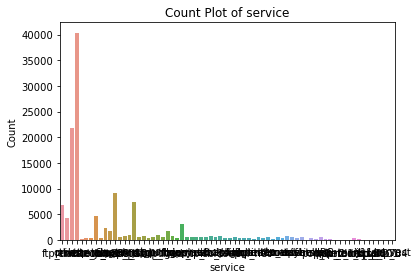

In [19]:
sns.countplot(X["'service'"])
plt.xlabel('service')
plt.ylabel('Count')
plt.title('Count Plot of service')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


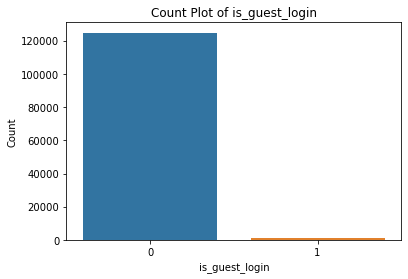

In [20]:
sns.countplot(X["'is_guest_login'"])
plt.xlabel('is_guest_login')
plt.ylabel('Count')
plt.title('Count Plot of is_guest_login')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


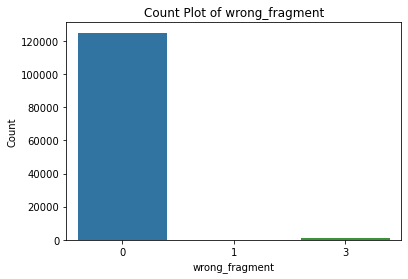

In [21]:
sns.countplot(X["'wrong_fragment'"])
plt.xlabel('wrong_fragment')
plt.ylabel('Count')
plt.title('Count Plot of wrong_fragment')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


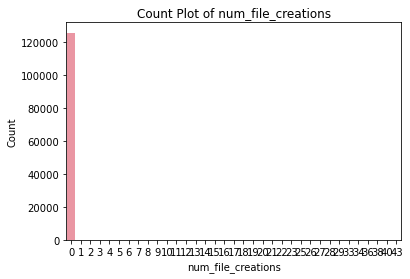

In [22]:
sns.countplot(X["'num_file_creations'"])
plt.xlabel('num_file_creations')
plt.ylabel('Count')
plt.title('Count Plot of num_file_creations')
plt.show()

/home/abhash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


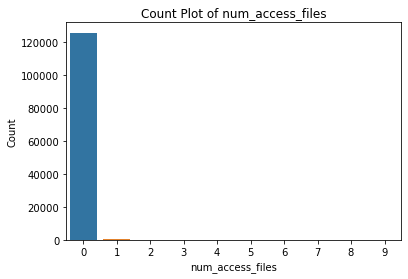

In [23]:
sns.countplot(X["'num_access_files'"])
plt.xlabel('num_access_files')
plt.ylabel('Count')
plt.title('Count Plot of num_access_files')
plt.show()



### Preprocessing

In [24]:
# What all are categorical features?
# What all are continuous?


In [25]:
# remove these categorical features from the list of columns to scale, we will encode them separately
cols_to_scale.remove("'flag'")
cols_to_scale.remove("'protocol_type'")
cols_to_scale.remove("'service'")
cols_to_one_hot_encode = ["'protocol_type'", "'service'" , "'flag'"]

### Feature Scaling ( Continuous attributes )

In [26]:
from sklearn.preprocessing import StandardScaler
scaled_features=X.copy()

scaled_features=scaled_features.drop(cols_to_one_hot_encode, axis=1)

features=scaled_features[cols_to_scale]
features

,'duration','src_bytes','dst_bytes','hot','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,0,491,0,0,2,2,0.0,0.0,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,13,1,0.0,0.0,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,123,6,1.0,1.0,0.0,0.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,5,5,0.2,0.2,0.0,0.0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,30,32,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,184,25,1.0,1.0,0.0,0.0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,105,145,0,2,2,0.0,0.0,0.0,0.0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,2231,384,0,1,1,0.0,0.0,0.0,0.0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,144,8,1.0,1.0,0.0,0.0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [27]:
scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)

In [28]:
features

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.6248708 ,
        -0.22453241, -0.37638703],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.6248708 ,
        -0.35501418, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703]])

In [29]:
cols_to_scale

["'duration'",
 "'src_bytes'",
 "'dst_bytes'",
 "'hot'",
 "'count'",
 "'srv_count'",
 "'serror_rate'",
 "'srv_serror_rate'",
 "'rerror_rate'",
 "'srv_rerror_rate'",
 "'same_srv_rate'",
 "'diff_srv_rate'",
 "'srv_diff_host_rate'",
 "'dst_host_count'",
 "'dst_host_srv_count'",
 "'dst_host_same_srv_rate'",
 "'dst_host_diff_srv_rate'",
 "'dst_host_same_src_port_rate'",
 "'dst_host_srv_diff_host_rate'",
 "'dst_host_serror_rate'",
 "'dst_host_srv_serror_rate'",
 "'dst_host_rerror_rate'",
 "'dst_host_srv_rerror_rate'"]

In [30]:
scaled_features[cols_to_scale]=features
scaled_features

,'duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,-0.110249,-0.007679,-0.004919,0,0,-0.095076,0,0,0,0,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,0,0,-0.095076,0,0,0,0,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,0,0,-0.095076,0,0,0,0,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,0,0,-0.095076,0,1,0,0,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,0,0,-0.095076,0,1,0,0,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,0,0,-0.095076,0,0,0,0,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.107178,-0.007744,-0.004883,0,0,-0.095076,0,0,0,0,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.110249,-0.007382,-0.004823,0,0,-0.095076,0,1,0,0,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.110249,-0.007762,-0.004919,0,0,-0.095076,0,0,0,0,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


### One hot encoding the categorical attributes

In [31]:
clean_data = X.copy();
clean_data = clean_data[cols_to_one_hot_encode]

In [32]:
clean_data

,'protocol_type','service','flag'
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols_to_one_hot_encode = ["'protocol_type'", "'service'" , "'flag'"]

column_trans=make_column_transformer(
(OneHotEncoder(),cols_to_one_hot_encode),remainder='passthrough')

In [34]:
# concatenating back the categorical features and the standard-scaled continuous ones
categorical_features = X[categorical_cols]
intermediate = pd.concat([scaled_features, categorical_features], axis=1)
clean_data = pd.concat([intermediate ,clean_data], axis=1)

In [35]:
clean_data=column_trans.fit_transform(clean_data)

In [36]:
clean_data.shape

(125973, 129)

In [37]:
clean_data

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [38]:
Y = pd.DataFrame(Y)

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y["'class'"] = label_encoder.fit_transform(Y["'class'"])

print(Y)

        'class'
0             1
1             1
2             0
3             1
4             1
...         ...
125968        0
125969        1
125970        1
125971        0
125972        1

[125973 rows x 1 columns]


In [40]:
clean_data.shape

(125973, 129)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(clean_data, Y, test_size=0.33, random_state=42)

### Log Reg

In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000,random_state=42, solver='liblinear')
ovr_clf=OneVsRestClassifier(logreg)
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear'))

In [43]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ovr_clf,X_train,y_train,scoring="accuracy",cv=10)

In [44]:
print("scores are:",scores)
print("mean:" ,scores.mean())

scores are: [0.97405521 0.9764218  0.97239336 0.97618483 0.97440758 0.97393365
 0.97511848 0.97452607 0.97274882 0.97322275]
mean: 0.9743012552700625


In [45]:
# confusion matrix 
# find precision recall FPR etc.
y_pred=ovr_clf.predict(X_test)
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
print("average=MACRO")
print("f1 score: ",f1_score(y_test,y_pred,average='macro'))
print("precision: ",precision_score(y_test,y_pred,average="macro"))
print("recall: ",recall_score(y_test,y_pred,average='macro'))
print("-----------------------------------------")
print("average=weighted")
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))
print("precision: ",precision_score(y_test,y_pred,average="weighted"))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("-----------------------------------------")
print("average=micro")
print("f1 score: ",f1_score(y_test,y_pred,average='micro'))
print("precision: ",precision_score(y_test,y_pred,average="micro"))
print("recall: ",recall_score(y_test,y_pred,average='micro'))


average=MACRO
f1 score:  0.9723284004047035
precision:  0.9728451241686837
recall:  0.9719000719187902
-----------------------------------------
average=weighted
f1 score:  0.9724677148037774
precision:  0.9725414741538754
recall:  0.9724814779178294
-----------------------------------------
average=micro
f1 score:  0.9724814779178294
precision:  0.9724814779178294
recall:  0.9724814779178294


## RBM


In [46]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [47]:
rbm = BernoulliRBM(n_components=50, learning_rate=0.1, batch_size=10, n_iter=10, random_state=0, verbose=True)

# Initialize logistic regression classifier
#logistic = LogisticRegression(solver='liblinear', max_iter=1000)

# Create a pipeline combining RBM and logistic regression
rbm_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logreg)])

# Train the pipeline
rbm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rbm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -7698.49, time = 2.09s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -11799.07, time = 2.41s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -19352.94, time = 2.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25230.91, time = 2.33s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -30951.01, time = 2.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -36659.60, time = 2.42s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -42970.65, time = 2.37s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -48597.02, time = 2.32s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -54188.91, time = 2.33s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -60452.55, time = 3.29s


/home/abhash/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8857885114981238


### SVM

In [61]:
# Model Creation SVC
from sklearn.svm import SVC
svm_clf=SVC()
ovr_clf_svc=OneVsRestClassifier(svm_clf)
ovr_clf_svc.fit(clean_data,y_train)

OneVsRestClassifier(estimator=SVC())

In [62]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ovr_clf_svc,clean_data,y_train,scoring="accuracy",cv=10)
print("scores are:",scores)
print("mean:" ,scores.mean())

scores are: [0.97381827 0.97085308 0.97061611 0.9778436  0.97310427 0.97334123
 0.97322275 0.97037915 0.97191943 0.9707346 ]
mean: 0.9725832485987207


In [397]:
# confusion matrix 
# find precision recall FPR etc.

# preparing X_test set (Transform the test set, dont fit it)
cols=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)']
temp_xtest=X_test.copy()
test_f=temp_xtest[cols]
feat=scaler.transform(test_f.values)
temp_xtest[cols]=feat
X_test_prep=column_trans.transform(temp_xtest)


# metrics for svc
y_pred=ovr_clf_svc.predict(X_test_prep)
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
print("---------------------------------------")
print("average=macro")
print("f1 score: ",f1_score(y_test,y_pred,average='macro'))
print("precision: ",precision_score(y_test,y_pred,average="macro"))
print("recall: ",recall_score(y_test,y_pred,average='macro'))
print("-----------------------------------------")
print("average=weighted")
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))
print("precision: ",precision_score(y_test,y_pred,average="weighted"))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("-----------------------------------------")
print("average=micro")
print("f1 score: ",f1_score(y_test,y_pred,average='micro'))
print("precision: ",precision_score(y_test,y_pred,average="micro"))
print("recall: ",recall_score(y_test,y_pred,average='micro'))


---------------------------------------
average=macro
f1 score:  0.9877031181379007
precision:  0.9901960784313726
recall:  0.9861111111111112
-----------------------------------------
average=weighted
f1 score:  0.9874176548089592
precision:  0.9882352941176471
recall:  0.9875
-----------------------------------------
average=micro
f1 score:  0.9875
precision:  0.9875
recall:  0.9875


## MLP

In [272]:
Y_train_mlp=pd.DataFrame(y_train)
Y_train_mlp

,'class'
18593,0
98800,0
60094,0
42119,1
82618,1
...,...
119879,0
103694,0
860,0
15795,1


In [273]:
# One hot encoding for the outputs
column_trans_y=make_column_transformer(
(OneHotEncoder(sparse=False),["'class'"]),remainder='passthrough')

onehot_y=column_trans_y.fit_transform(Y_train_mlp)

In [274]:
onehot_y.shape

(84401, 2)

In [275]:
X_train.shape

(84401, 129)

In [276]:
from sklearn.neural_network import MLPClassifier
# clf_mlp=MLPClassifier(activation='tanh',alpha=0.001,hidden_layer_sizes=(12,2),random_state=42)
clf_mlp=MLPClassifier(activation='tanh',alpha=0.001,hidden_layer_sizes=(100,50,25,20,10),random_state=42)
clf_mlp.fit(X_train,onehot_y)


MLPClassifier(activation='tanh', alpha=0.001,
              hidden_layer_sizes=(100, 50, 25, 20, 10), random_state=42)

In [277]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_mlp,X_train,onehot_y,scoring="accuracy",cv=10)
print("scores are:",scores)
print("mean:" ,scores.mean())

scores are: [0.99514276 0.9957346  0.99656398 0.99585308 0.99668246 0.99691943
 0.99537915 0.99620853 0.99703791 0.99668246]
mean: 0.9962204366972085


In [278]:
Y_test_mlp=pd.DataFrame(y_test)
column_trans_ytest=make_column_transformer(
(OneHotEncoder(sparse=False),["'class'"]),remainder='passthrough')

onehot_y_test=column_trans_ytest.fit_transform(Y_test_mlp)
onehot_y_test.shape

(41572, 2)

In [279]:
X_test.shape

(41572, 129)

In [280]:
y_pred=clf_mlp.predict(X_test)
y_pred.shape

(41572, 2)

In [281]:
onehot_y_test.shape

(41572, 2)

In [282]:

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
print("---------------------------------------")
print("average=macro")
print("f1 score: ",f1_score(onehot_y_test,y_pred,average='macro'))
print("precision: ",precision_score(onehot_y_test,y_pred,average="macro"))
print("recall: ",recall_score(onehot_y_test,y_pred,average='macro'))
print("f1 score: ",f1_score(onehot_y_test,y_pred,average='weighted'))
print("precision: ",precision_score(onehot_y_test,y_pred,average="weighted"))
print("recall: ",recall_score(onehot_y_test,y_pred,average='weighted'))

---------------------------------------
average=macro
f1 score:  0.9961957860019314
precision:  0.9963117223227218
recall:  0.9960811959134488
f1 score:  0.996210982598789
precision:  0.9962720303592578
recall:  0.9961512556528432
